<Figure size 640x480 with 0 Axes>

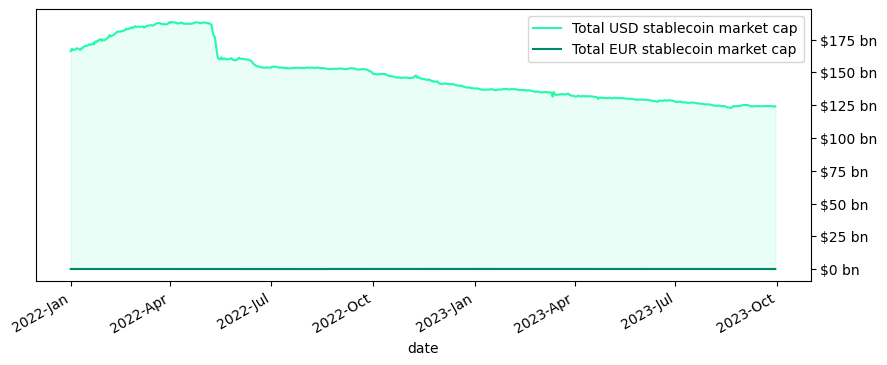

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import matplotlib.ticker as mticker
from matplotlib.ticker import FuncFormatter

# Read your data
df = pd.read_csv('stablecoins (1).csv')
df['time'] = df['Timestamp'].apply(lambda x: datetime.fromtimestamp(x))

# Filter your data to the desired date range
df = df[(df['time'] >= datetime.fromisoformat('2022-01-01')) & (df['time'] <= datetime.fromisoformat('2023-09-30'))]

x = df['time']

eur_columns = ['EURS', 'EUROC', 'EURE', 'EUROe']

df[eur_columns] = df[eur_columns].fillna(0)

# Calculate the sum of 'EUR' stablecoins starting from the first non-null value
df['EUR_total'] = (df['EURS']+ df['EUROC']+ df['EURE']+ df['EUROe'])


x = df['time']
y1 = df['Total'] - df['EUR_total']
y2 = df['EUR_total']

fig = plt.figure()
fig, ax = plt.subplots(figsize=(10, 4))

ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
fig.autofmt_xdate()

ax.plot(x, y1, label='Total USD stablecoin market cap', color=(36/255, 251/255, 169/255))
ax.plot(x, y2, label='Total EUR stablecoin market cap', color=(0/255, 136/255, 106/255))
ax.fill_between(x, y1, color=(36/255, 251/255, 169/255), alpha=0.1)
ax.fill_between(x, y2, color=(0/255, 136/255, 106/255), alpha=0.1)



# Define a function to format y-axis labels in billion dollars
def billions_formatter(x, pos):
    return f'${x/1e9:.0f} bn'

# Apply the custom formatter to the y-axis
ax.yaxis.set_major_formatter(FuncFormatter(billions_formatter))

ticks_loc = ax.get_yticks().tolist()
ax.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc))

ticks_loc = ax.get_yticks().tolist()
ax.yaxis.tick_right()
ax.legend()

ax.set_xlabel('date')

plt.show()
